<a href="https://colab.research.google.com/github/PeruVinayak/Data_Analysis_Aerofit/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Case Study**

**About Aerofit:**

*  Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem:**

*  The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

*  Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

*  Construct two-way contingency tables for each AeroFit treadmill product and compute all conditional and marginal probabilities and their insights/impact on the business.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
df = pd.read_csv('aerofit_treadmill.txt')
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
# Total no.of rows and columns
df.shape

(180, 9)

In [ ]:
# Data type of each columns
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# Missing values for each column
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Overall missing values in dataframe
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Product-wise treadmill users
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Total entry-level treadmill users
df[df.Product == 'KP281'].count()[0]

80

In [ ]:
# Total mid-level treadmill users
df[df.Product == 'KP481'].count()[0]

60

In [ ]:
# Total advance-level treadmill users
df[df.Product == 'KP781'].count()[0]

40

**2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**

In [ ]:
# Difference between mean and median (50%)
df.describe().loc[['mean','50%']]

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000


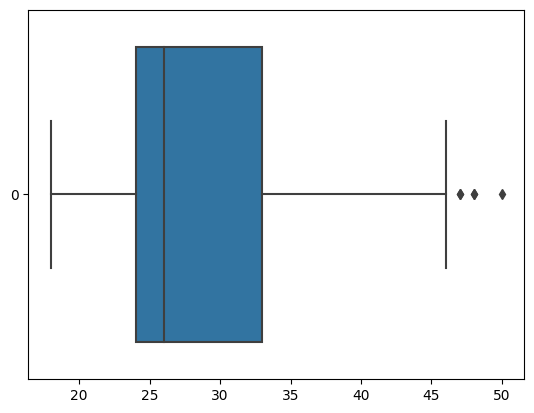

In [ ]:
# Boxplot using Age column
sns.boxplot(data=df['Age'],orient = 'h')
plt.show()

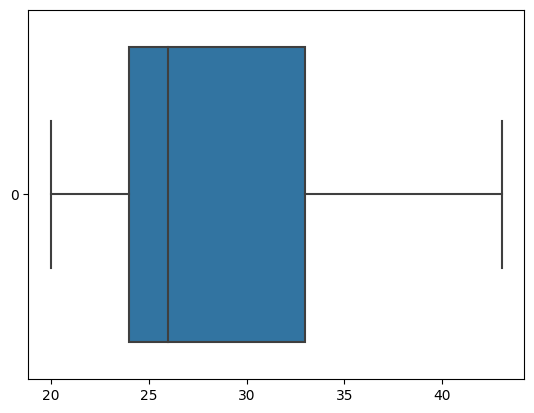

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Age column
a_p_5 = np.percentile(df['Age'],5)
a_p_95 = np.percentile(df['Age'],95)
a = np.clip(np.array(df['Age']),a_p_5,a_p_95) # clipped array
sns.boxplot(a,orient= 'h')
plt.show()

In [ ]:
a_p_25 = np.percentile(df['Age'],25)
a_p_75 = np.percentile(df['Age'],75)
iqr_a = a_p_75 - a_p_25
upper_limit_age = a_p_75 + 1.5 * iqr_a
print(iqr_a,upper_limit_age)

9.0 46.5


In [ ]:
# Outliers % based on Age
Outliers_age = df[df['Age'] > upper_limit_age]
round((len(Outliers_age)/len(df))*100,2)

2.78

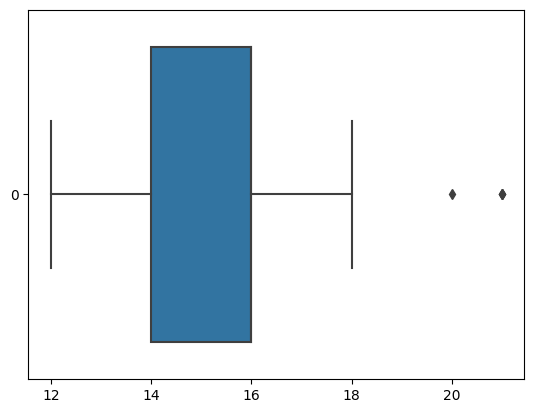

In [ ]:
# Boxplot using Education column
sns.boxplot(data=df['Education'],orient = 'h')
plt.show()

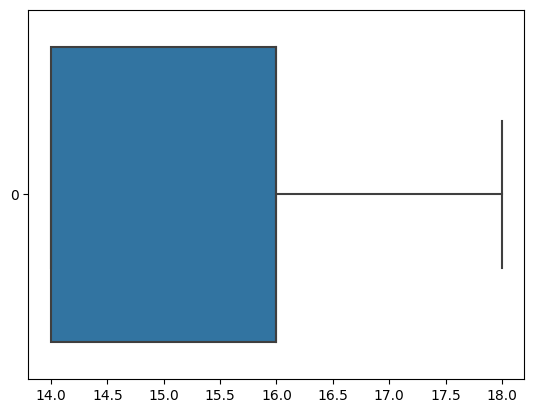

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Education column
e_p_5 = np.percentile(df['Education'],5)
e_p_95 = np.percentile(df['Education'],95)
e = np.clip(np.array(df['Education']),e_p_5,e_p_95) # clipped array
sns.boxplot(e,orient= 'h')
plt.show()

In [ ]:
e_p_25 = np.percentile(df['Education'],25)
e_p_75 = np.percentile(df['Education'],75)
iqr_e = e_p_75 - e_p_25
upper_limit_edu = e_p_75 + 1.5 * iqr_e
print(iqr_e,upper_limit_edu)

2.0 19.0


In [ ]:
# Outliers % based on Education
Outliers_edu = df[df['Education'] > upper_limit_edu]
round((len(Outliers_edu)/len(df))*100,2)

2.22

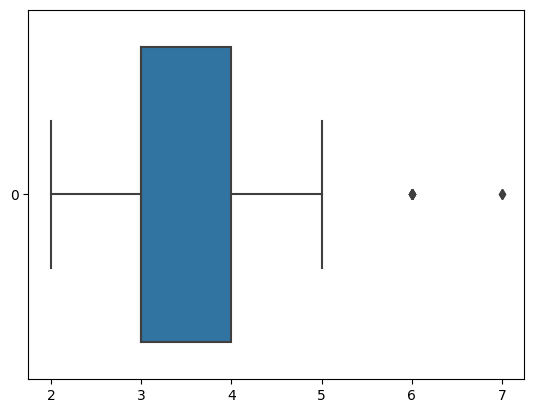

In [ ]:
# Boxplot using Usage column
sns.boxplot(data=df['Usage'],orient = 'h')
plt.show()

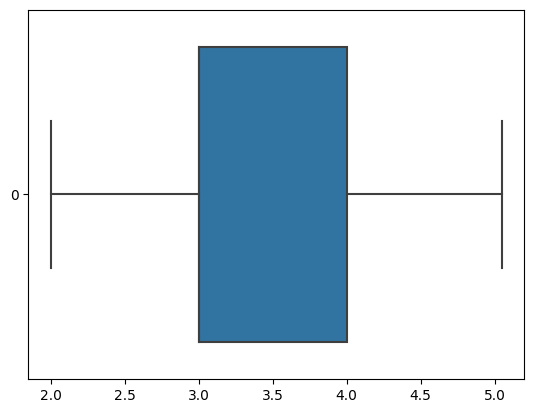

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Usage column
u_p_5 = np.percentile(df['Usage'],5)
u_p_95 = np.percentile(df['Usage'],95)
u = np.clip(np.array(df['Usage']),u_p_5,u_p_95) # clipped array
sns.boxplot(u,orient= 'h')
plt.show()

In [ ]:
u_p_25 = np.percentile(df['Usage'],25)
u_p_75 = np.percentile(df['Usage'],75)
iqr_u = u_p_75 - u_p_25
upper_limit_usage = u_p_75 + 1.5 * iqr_u
print(iqr_u,upper_limit_usage)

1.0 5.5


In [ ]:
# Outliers % based on Usage
Outliers_usage = df[df['Usage'] > upper_limit_usage]
round((len(Outliers_usage)/len(df))*100,2)

5.0

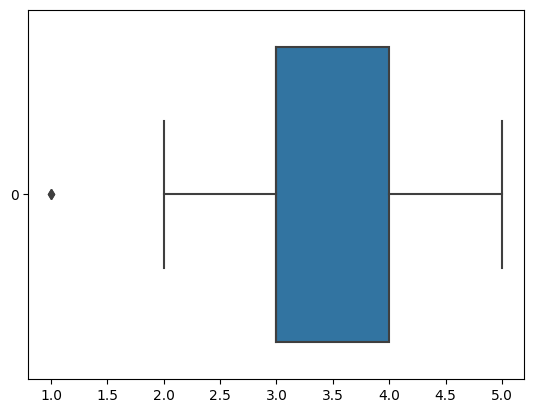

In [ ]:
# Boxplot using Fitness column
sns.boxplot(data=df['Fitness'],orient = 'h')
plt.show()

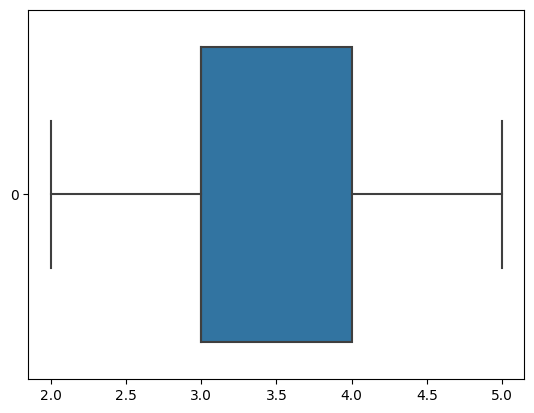

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Fitness column
f_p_5 = np.percentile(df['Fitness'],5)
f_p_95 = np.percentile(df['Fitness'],95)
f = np.clip(np.array(df['Fitness']),f_p_5,f_p_95) # clipped array
sns.boxplot(f,orient= 'h')
plt.show()

In [ ]:
f_p_25 = np.percentile(df['Fitness'],25)
f_p_75 = np.percentile(df['Fitness'],75)
iqr_f = f_p_75 - f_p_25
lower_limit_fit = f_p_25 - 1.5 * iqr_f
print(iqr_f,lower_limit_fit)

1.0 1.5


In [ ]:
# Outliers % based on Fitness
Outliers_fitness = df[df['Fitness'] < lower_limit_fit]
round((len(Outliers_fitness)/len(df))*100,2)

1.11

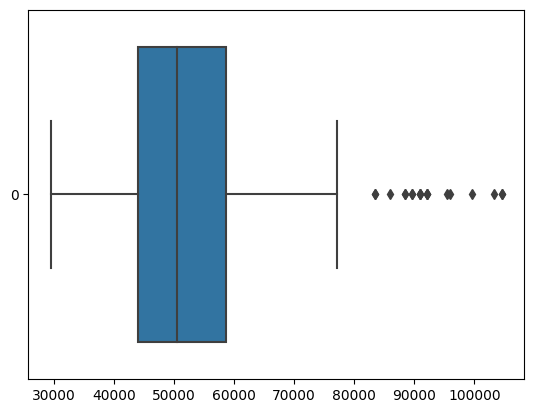

In [ ]:
# Boxplot using Income column
sns.boxplot(data=df['Income'],orient = 'h')
plt.show()

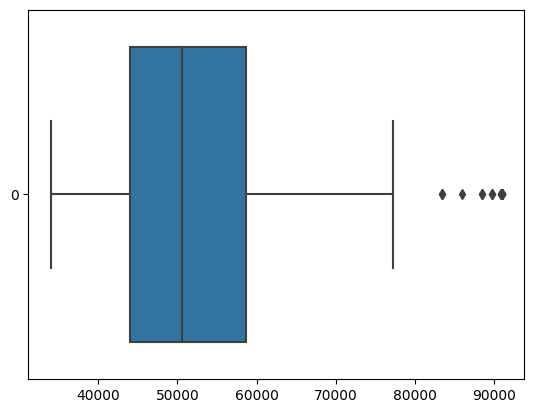

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Income column
i_p_5 = np.percentile(df['Income'],5)
i_p_95 = np.percentile(df['Income'],95)
i = np.clip(np.array(df['Income']),i_p_5,i_p_95) # clipped array
sns.boxplot(i,orient= 'h')
plt.show()

In [ ]:
i_p_25 = np.percentile(df['Income'],25)
i_p_75 = np.percentile(df['Income'],75)
iqr_i = i_p_75 - i_p_25
upper_limit_income = i_p_75 + 1.5 * iqr_i
print(iqr_i,upper_limit_income)

14609.25 80581.875


In [ ]:
# Outliers % based on Income
Outliers_income = df[df['Income'] > upper_limit_income]
round((len(Outliers_income)/len(df))*100,2)

10.56

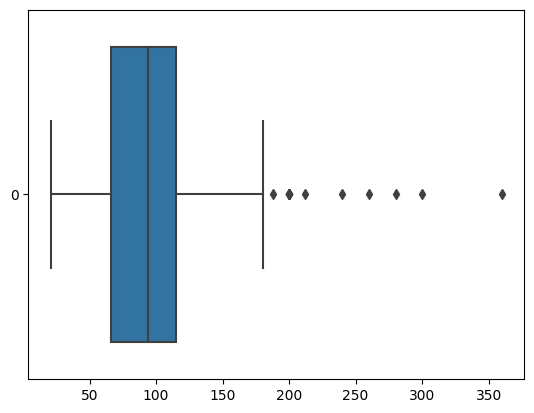

In [ ]:
# Boxplot using Miles column
sns.boxplot(data=df['Miles'],orient = 'h')
plt.show()

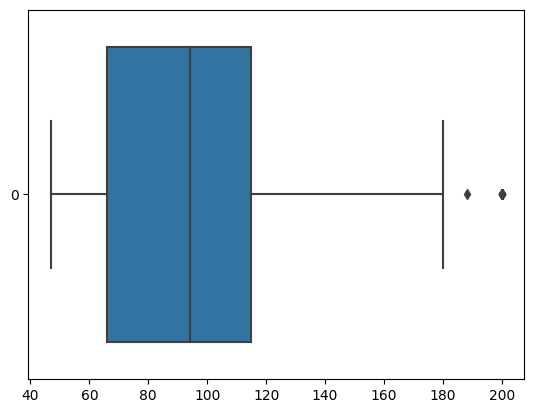

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Miles column
m_p_5 = np.percentile(df['Miles'],5)
m_p_95 = np.percentile(df['Miles'],95)
m = np.clip(np.array(df['Miles']),m_p_5,m_p_95) # clipped array
sns.boxplot(m,orient= 'h')
plt.show()

In [ ]:
m_p_25 = np.percentile(df['Miles'],25)
m_p_75 = np.percentile(df['Miles'],75)
iqr_m = m_p_75 - m_p_25
upper_limit_miles = m_p_75 + 1.5 * iqr_m
print(iqr_m,upper_limit_miles)

48.75 187.875


In [ ]:
# Outliers % based on Miles
Outliers_miles = df[df['Miles'] > upper_limit_miles]
round((len(Outliers_miles)/len(df))*100,2)

7.22

**3. Check if features like marital status, Gender, and age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


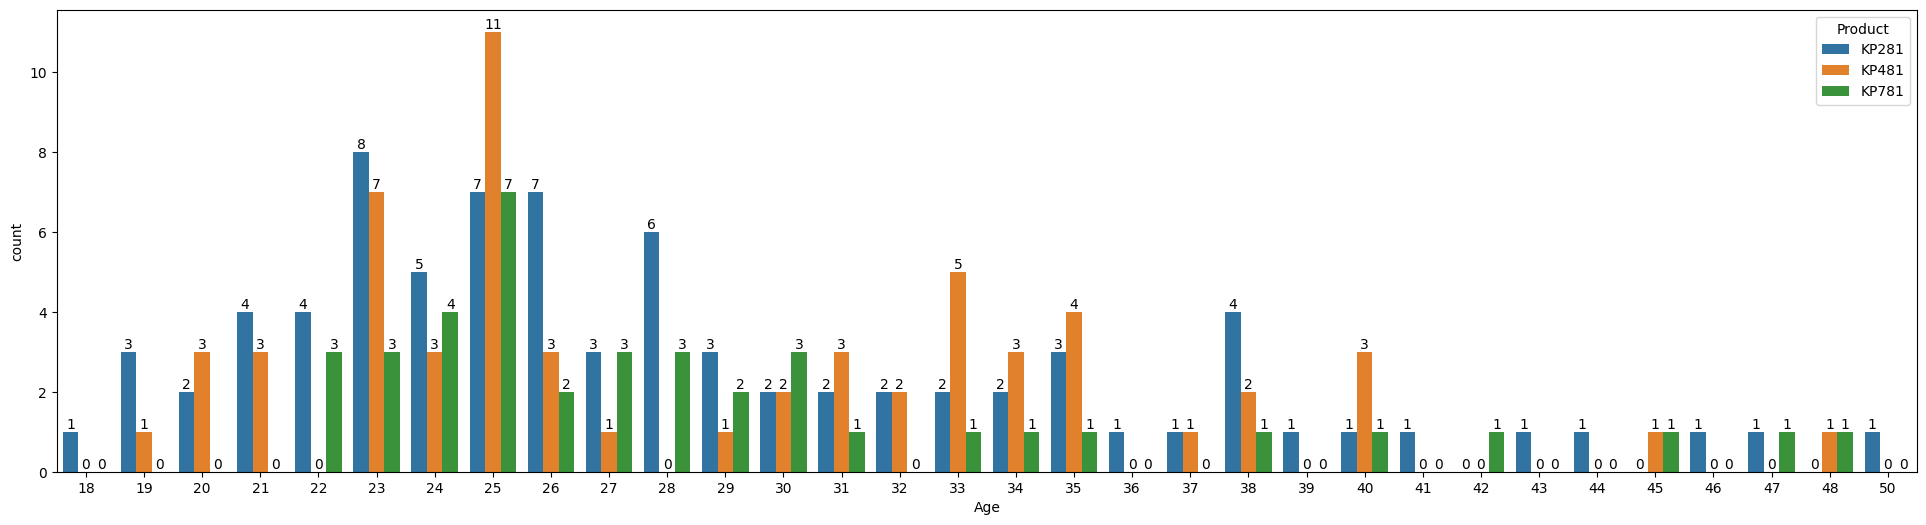

In [ ]:
# Impact on product purchased based on Age
plt.figure(figsize=(24,6))
xy = sns.countplot(data=df,x='Age',hue='Product')
#sns.countplot(data=df,x='Product',hue='Age')
for i in xy.containers:
    xy.bar_label(i)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

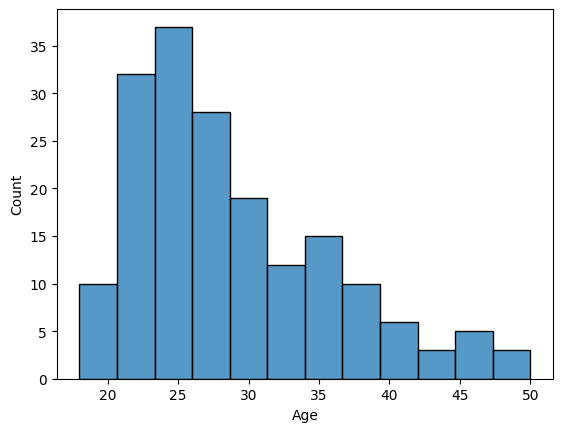

In [ ]:
sns.histplot(data=df['Age'],bins=12)

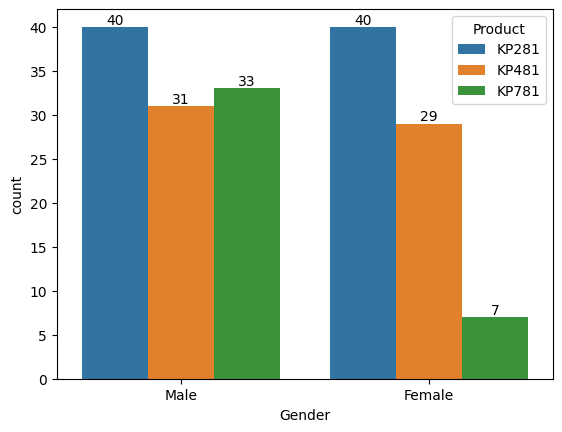

In [ ]:
# Impact on product purchased based on Gender
ab = sns.countplot(data=df,hue='Product',x='Gender')
for i in ab.containers:
    ab.bar_label(i)
plt.show()

<Axes: xlabel='Gender', ylabel='Count'>

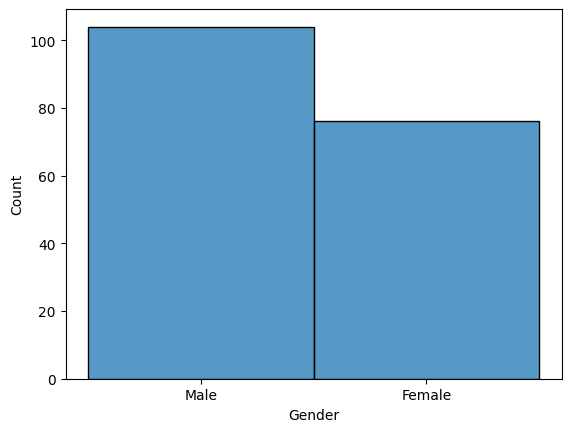

In [ ]:
sns.histplot(data=df['Gender'])

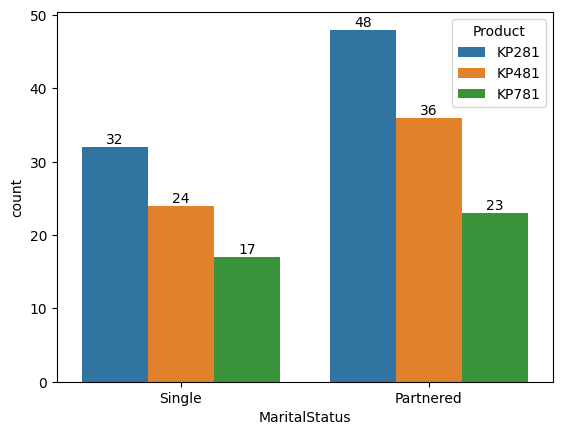

In [ ]:
# Impact on product purchased based on Marital status
ax = sns.countplot(data=df,hue='Product',x='MaritalStatus')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='Count'>

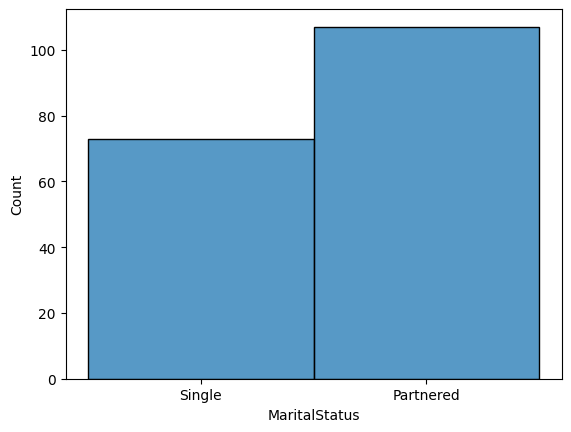

In [ ]:
sns.histplot(data=df['MaritalStatus'])

In [ ]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df[df.MaritalStatus=='Partnered'].Gender.value_counts()

Male      61
Female    46
Name: Gender, dtype: int64

In [ ]:
df[df.MaritalStatus=='Single'].Gender.value_counts()

Male      43
Female    30
Name: Gender, dtype: int64

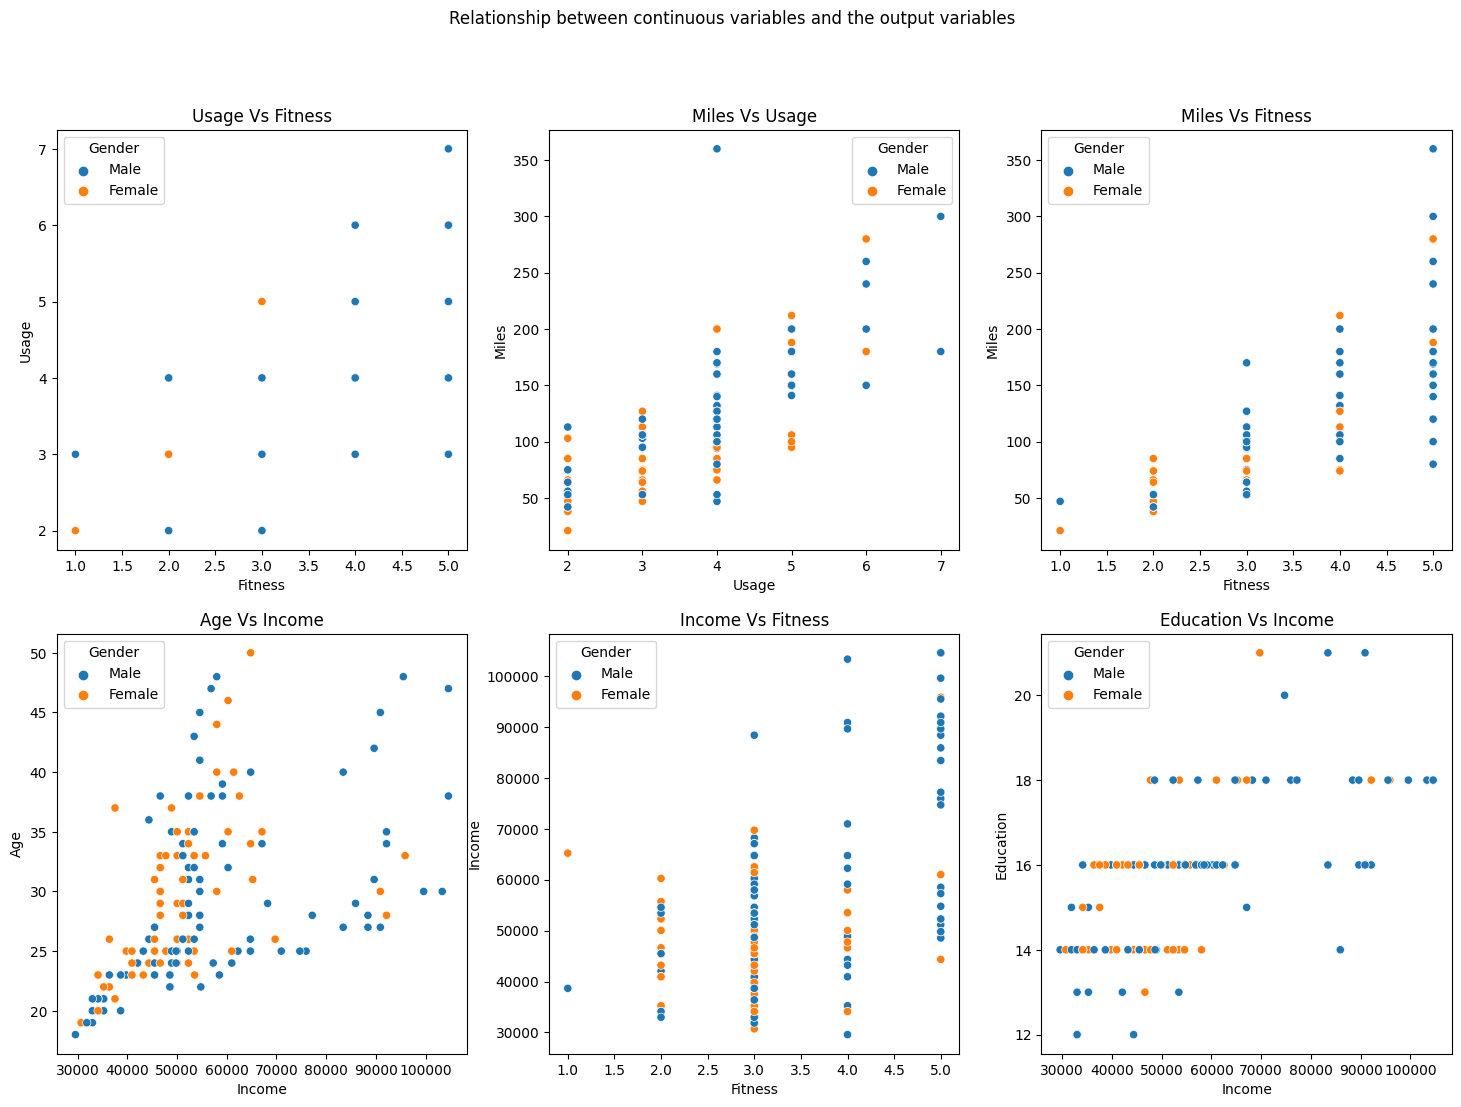

In [ ]:
# Relationship between continuous variables and the output variables
fig = plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
sns.scatterplot(data=df,x='Fitness',y='Usage',hue='Gender') # Positive correlation
plt.title('Usage Vs Fitness')

plt.subplot(2,3,2)
sns.scatterplot(data=df,x='Usage',y='Miles',hue='Gender') # Positive correlation
plt.title('Miles Vs Usage')

plt.subplot(2,3,3)
sns.scatterplot(data=df,x='Fitness',y='Miles',hue='Gender') # Positive correlation
plt.title('Miles Vs Fitness')

plt.subplot(2,3,4)
sns.scatterplot(data=df,x='Income',y='Age', hue='Gender') # Target the Males who are aged in the range of 25 to 40 to get better income
plt.title('Age Vs Income')

plt.subplot(2,3,5)
sns.scatterplot(data=df,x='Fitness',y='Income',hue='Gender') # Positive correlation
plt.title('Income Vs Fitness')

plt.subplot(2,3,6)
sns.scatterplot(data=df,x='Income',y='Education',hue='Gender') # Target the people who are highly educated (more than 14 years) to get better income
plt.title('Education Vs Income')

fig.suptitle('Relationship between continuous variables and the output variables')
plt.show()

**4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)**

In [ ]:
round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  margins = True,
                  margins_name = 'Total',
                  normalize = True),2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


In [ ]:
# Conditional probability --> What is the probability of Product (KP281 or KP481 or KP781) purchased given that Gender (Male or Female) --> P(Product | Gender)
round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  normalize = 'columns'),2)

Gender,Female,Male
Product,,
KP281,0.53,0.38
KP481,0.38,0.30
KP781,0.09,0.32


In [ ]:
# Conditional probability --> What is the probability of Gender (Male or Female) given that Product (KP281 or KP481 or KP781) purchased --> P(Gender | Product)
round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  normalize = 'index'),2)

Gender,Female,Male
Product,,
KP281,0.50,0.50
KP481,0.48,0.52
KP781,0.18,0.82


In [ ]:
df.groupby('Product').Gender.value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: Gender, dtype: int64

**5. Check correlation among different factors using heat maps or pair plots.**

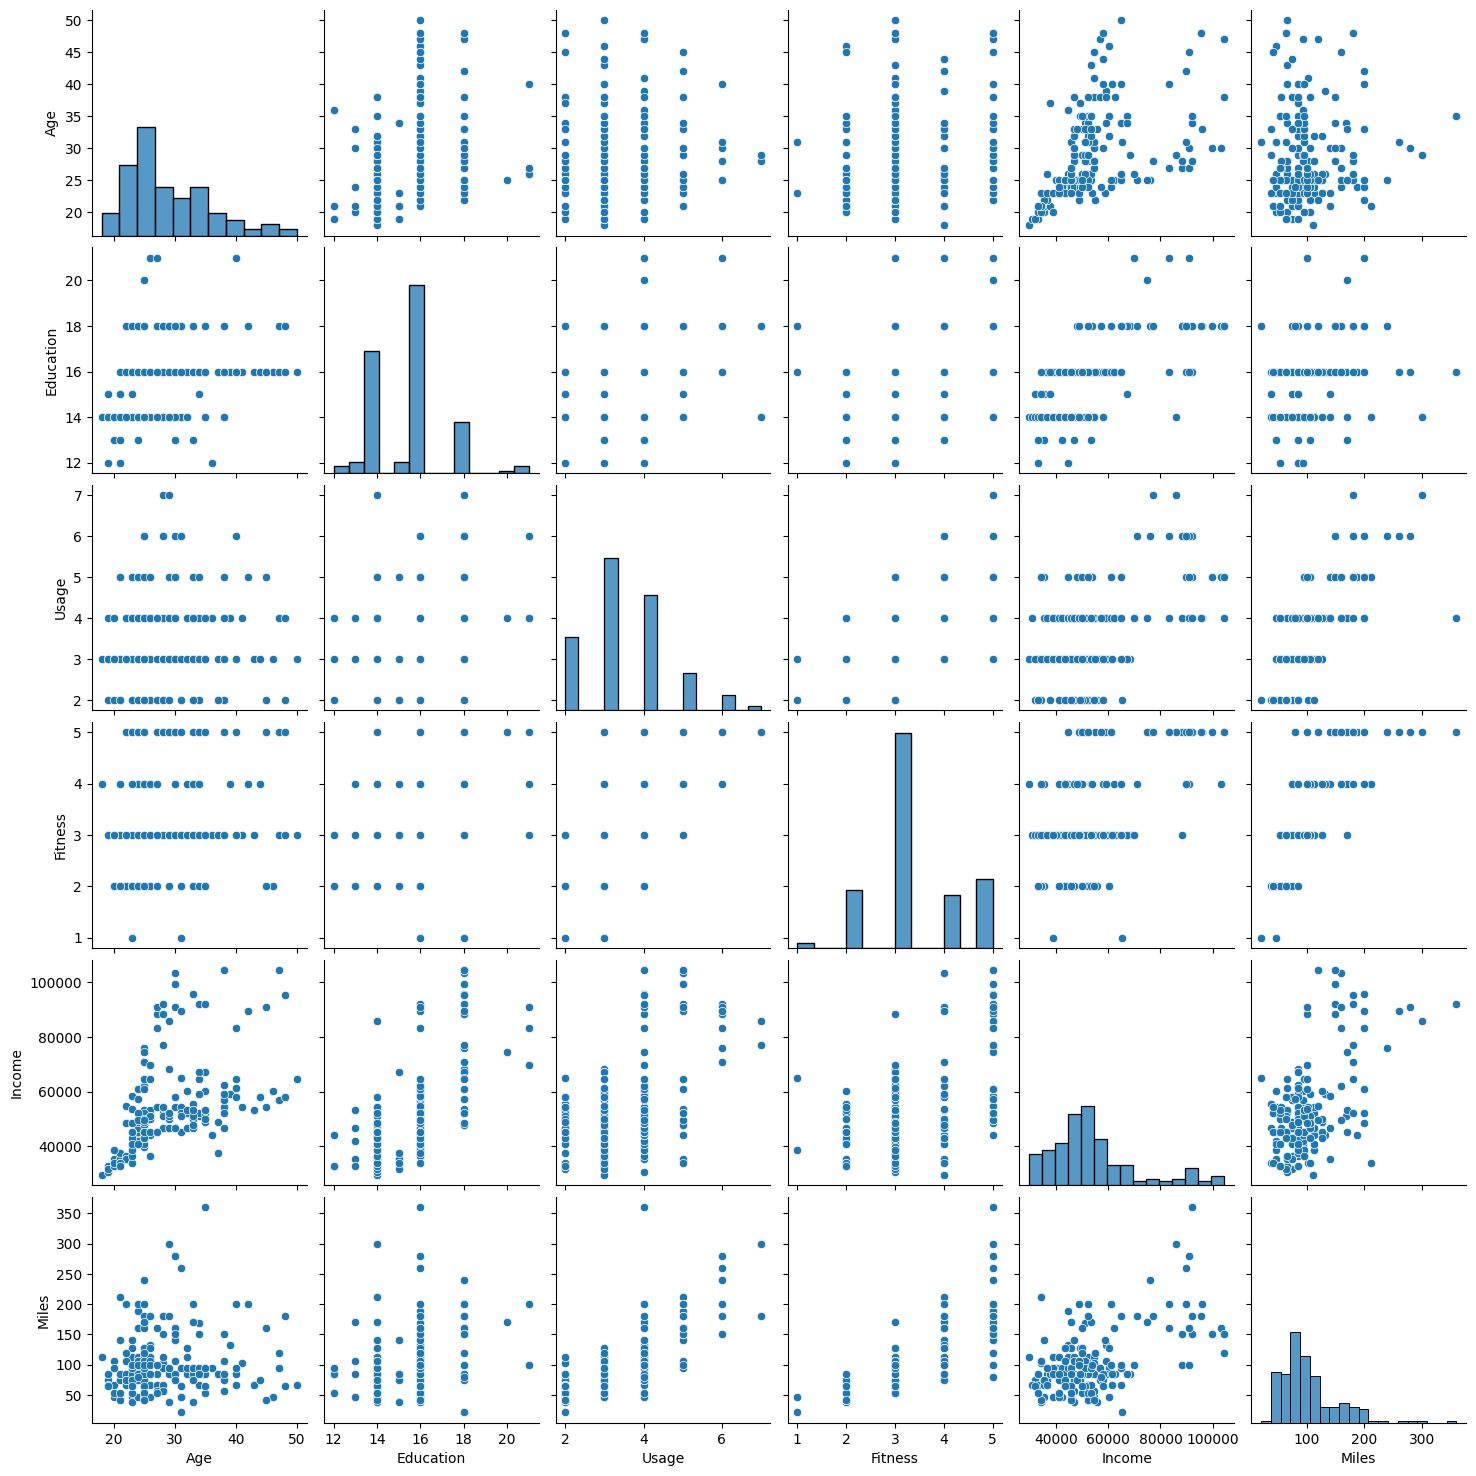

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-56-61da65fb820a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='crest')


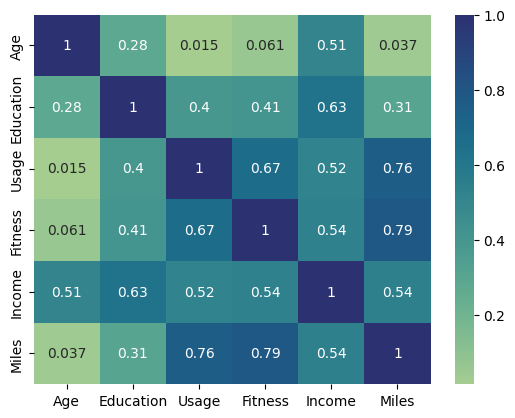

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

**6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?**

In [ ]:
# Given that a customer is Male, what is the probability he’ll purchase KP781? --> P(KP781 | Male) = 0.32, P(KP481 | Male) = 0.30, P(KP281 | Male) = 0.38
round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  normalize = 'columns'),2)

Gender,Female,Male
Product,,
KP281,0.53,0.38
KP481,0.38,0.30
KP781,0.09,0.32


In [ ]:
# P(KP781 | Male) = 0.32
round(pd.crosstab(index = df['Product']=='KP781',
                  columns = df['Gender']=='Male',
                  normalize = 'columns'),2)

Gender,False,True
Product,,
False,0.91,0.68
True,0.09,0.32


**7. Customer Profiling - Categorization of users.**

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.Fitness.value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
def customer_profile(user):
    if user == 5:
        return 'Vigorous'
    elif user in [3,4]:
        return 'Moderate'
    else:
        return 'Gentle'
df['Customer_profile'] = df['Fitness'].apply(customer_profile)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_profile
0,KP281,18,Male,14,Single,3,4,29562,112,Moderate
1,KP281,19,Male,15,Single,2,3,31836,75,Moderate
2,KP281,19,Female,14,Partnered,4,3,30699,66,Moderate
3,KP281,19,Male,12,Single,3,3,32973,85,Moderate
4,KP281,20,Male,13,Partnered,4,2,35247,47,Gentle


In [ ]:
df[df.Fitness == df.Fitness.max()].head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_profile
23,KP281,24,Female,16,Partnered,5,5,44343,188,Vigorous
61,KP281,34,Male,16,Single,4,5,51165,169,Vigorous
141,KP781,22,Male,16,Single,3,5,54781,120,Vigorous


In [ ]:
df.groupby('Product').Age.mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [ ]:
df.groupby('Product').Gender.value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: Gender, dtype: int64

In [ ]:
df.groupby('Product').Income.mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

**8. Probability- marginal, conditional probability.**

In [ ]:
# Marginal probability

round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  margins = True,
                  margins_name = 'Total',
                  normalize = True),2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


In [ ]:
# Conditional probability --> What is the probability of Gender (Male or Female) given that Product (KP281 or KP481 or KP781) purchased --> P(Gender | Product)
round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  normalize = 'index'),2)

Gender,Female,Male
Product,,
KP281,0.50,0.50
KP481,0.48,0.52
KP781,0.18,0.82


In [ ]:
# Conditional probability --> What is the probability of Product (KP281 or KP481 or KP781) purchased given that Gender (Male or Female) --> P(Product | Gender)
round(pd.crosstab(index = df['Product'],
                  columns = df['Gender'],
                  normalize = 'columns'),2)

Gender,Female,Male
Product,,
KP281,0.53,0.38
KP481,0.38,0.30
KP781,0.09,0.32


**9. Recommendations and actionable insights:**

1.   Target the people (especially male) who are aged in the range of 25 to 40 to get more sales/profit.
2.   Target the people who are highly educated (more than 14 years of education) as they have more income and it will lead us to get more sales/profit.
3.   Identified that most of the female users are purchased KP281 and it implies that they are not consistent hence didn't upgraded to the next level.
4.   Target those female users  who are not upgraded to the KP481 or KP781 and encourage them to go for it by explaining the features and benefits of the product.
5.   Identified that most of the partnered female users are not continuing to use treadmill so, encourage them to be consistent.
6.   In total KP781 users, 82% of them are male users so, there is a clear domination whereas for KP281 and KP481 almost equal male & female users.  
7.   Identified that the fitness level increases for the users who is using the treadmill frequeantly/more. (i.e. Usage positively correlated to Fitness).
8.   Identified that the fitness level increases for the users who is running more miles using treadmill. (i.e. Miles positively correlated to Fitness).
9.   There is no impact on product purchased based on marital status.
10.  There is an impact on product purchased based on the age as most of them are falls in the range of age 20 to 35.
11.  There is an impact on product purchased based on Gender as we can clearly see that the Male users who purchased KP781 is way more than Female users.